In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
df_products = pd.read_csv('/content/drive/My Drive/BA820-Project/productinfo.csv')
df_reviews_1 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews0-250.csv")
df_reviews_2 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews250-500.csv")
df_reviews_3 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews500-750.csv")
df_reviews_4 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews750-1250.csv")
df_reviews_5 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews1250-end.csv")

<ipython-input-3-10c390fb889f>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews0-250.csv")
<ipython-input-3-10c390fb889f>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_4 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews750-1250.csv")
<ipython-input-3-10c390fb889f>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_5 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews1250-end.csv")


In [ ]:
df_products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


# 1. Data Exploration

In [ ]:
df_products['highlights'].unique()

array(["['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",
       ...,
       "['Best for Oily, Combo, Normal Skin', 'Without Parabens', 'Without Mineral Oil', 'Matte Finish', 'Salicylic Acid']",
       "['Natural Finish', 'Without Mineral Oil', 'Without Parabens']",
       "['Hyaluronic Acid', 'High Shine Finish', 'Plumping', 'Hydrating', 'Medium Coverage']"],
      dtype=object)

In [ ]:
df_products['variation_type'].unique()

array([nan, 'Size + Concentration + Formulation', 'Scent', 'Size',
       'Color', 'Size + Concentration', 'Type', 'Formulation'],
      dtype=object)

In [ ]:
df_products['variation_value'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL Eau de Parfum Spray', ...,
       '0.25 oz/ 7.5 ml', '2.6 oz', '2 oz / 60 mL eau de parfum spray'],
      dtype=object)

In [ ]:
df_products['size'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL', ..., '0.25 oz/ 7.5 ml',
       '2.6 oz', '.11 oz / 3.2 mL'], dtype=object)

In [ ]:
df_reviews = pd.concat([df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982

## 1.1 null values exploration

**PRODUCT TABLE**:
1. drop `sale_price_usd`, `value_price_usd`, `variation_desc`,`child_max_price`, `child_min_price`, `size`, `variation_type`, `variation_value`
2. impute values into `highlights` and `ingredients` with "NA"
3. keep `tertiary_category` for dimensionality reduction? impute with unknown for this + the `secondary_category` nulls too
4. for reviews nulls, check if any reviews exist in the reviews table & count them. Impute with that value, else 0
5. for ratings nulls, impute with the mean or median depending on skewness OR do average of ratings in review table

In [ ]:
import numpy as np
np.round((df_products.isna().sum())/len(df_products),2).sort_values(ascending=False)

sale_price_usd        0.97
value_price_usd       0.95
variation_desc        0.85
child_max_price       0.68
child_min_price       0.68
highlights            0.26
size                  0.19
variation_value       0.19
variation_type        0.17
tertiary_category     0.12
ingredients           0.11
rating                0.03
reviews               0.03
sephora_exclusive     0.00
brand_id              0.00
child_count           0.00
secondary_category    0.00
primary_category      0.00
new                   0.00
out_of_stock          0.00
online_only           0.00
limited_edition       0.00
brand_name            0.00
product_name          0.00
price_usd             0.00
loves_count           0.00
product_id            0.00
dtype: float64

In [ ]:
null_rows = df_products[df_products['size'].isnull() & df_products['variation_value'].isnull()] #due to similarities between size and variation_value columns, we considered to fill in with overlaps

print(len(null_rows)) #however, teh result shows that most of the rows have missing values in both columns

1333


**REVIEW TABLE**:
1. Drop `helpfulness` due to a significant number of missing values
2.  Drop the `is_recommended` column By analyzing the ratings, we can infer whether a product is likely to be recommended without the explicit need for the is_recommended data point.
2. Replace null review_text and review_title with "NA"
3. Replace skin_tone, eye_color, skin_type, hair_color with "Unknown"

In [ ]:
(df_reviews.isna().sum()/len(df_reviews)).sort_values(ascending= False)

helpfulness                 0.513145
review_title                0.283855
hair_color                  0.207206
eye_color                   0.191544
skin_tone                   0.155827
is_recommended              0.153496
skin_type                   0.101933
review_text                 0.001319
brand_name                  0.000000
product_name                0.000000
product_id                  0.000000
Unnamed: 0                  0.000000
author_id                   0.000000
submission_time             0.000000
total_pos_feedback_count    0.000000
total_neg_feedback_count    0.000000
total_feedback_count        0.000000
rating                      0.000000
price_usd                   0.000000
dtype: float64

### 1.1.1 dropping columns with large missing values

In [ ]:
df_products = df_products.drop(columns=['value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price', 'variation_desc', 'variation_type', 'variation_value', 'size'])

In [ ]:
df_reviews = df_reviews.drop(columns=['helpfulness', 'is_recommended', 'Unnamed: 0'])

In [ ]:
df_products.shape, df_reviews.shape

((8494, 19), (1094411, 16))

### 1.1.2 null value imputation

**PRODUCT TABLE**

In [ ]:
df_products.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
ingredients            945
price_usd                0
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
dtype: int64

Impute missing values in 'highlights' and 'ingredients' columns with 'Unknown'

In [ ]:
df_products['highlights'] = df_products['highlights'].fillna('Unknown')
df_products['ingredients'] = df_products['ingredients'].fillna('Unknown')

Impute missing values in 'tertiary_category' and 'secondary_category' columns with 'Unknown'

In [ ]:
df_products['tertiary_category'] = df_products['tertiary_category'].fillna('Unknown')
df_products['secondary_category'] = df_products['secondary_category'].fillna('Unknown')

**REVIEW TABLE**

Replace null values in 'review_text' and 'review_title' with Unknown'

In [ ]:
df_reviews['review_text'] = df_reviews['review_text'].fillna('Unknown')
df_reviews['review_title'] = df_reviews['review_title'].fillna('Unknown')

Replace null values in 'skin_tone', 'eye_color', 'skin_type', and 'hair_color' with 'Unknown'

In [ ]:
df_reviews['skin_tone'] = df_reviews['skin_tone'].fillna('Unknown')
df_reviews['eye_color'] = df_reviews['eye_color'].fillna('Unknown')
df_reviews['skin_type'] = df_reviews['skin_type'].fillna('Unknown')
df_reviews['hair_color'] = df_reviews['hair_color'].fillna('Unknown')

Count the number of rows with null 'reviews' in df_products

In [ ]:
df_products[df_products['reviews'].isna()].shape[0]

278

Update the `reviews` column in df_products with the actual count of reviews if available, or impute it with 0 if no reviews are found. Iterated over rows in the df_products where the reviews column is null, identifying each product by its ID, and counting corresponding reviews in the df_reviews.

In [ ]:
null_reviews = df_products[df_products['reviews'].isna()]
null_reviews.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
42,P471525,Arancia di Capri Candle,5847,Acqua di Parma,601,NaN,NaN,Unknown,82.0,0,0,1,0,0,Unknown,Fragrance,Candles & Home Scents,Candles,0
60,P473154,Mini Baomint Moisturizing Curl Defining Gel,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Glycerin, Prunus Amygdalus Dul...",14.0,0,0,0,0,1,"['allure 2020 Best of Beauty Award Winner', 'C...",Hair,Mini Size,Unknown,0
61,P473153,Mini Baomint Moisturizing Curl Defining Cream,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",14.0,0,0,1,0,1,"['Clean at Sephora', 'Good for: Volume', 'All ...",Hair,Mini Size,Unknown,0
62,P473152,Mini Baomint Leave-In Conditioning Styler,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",13.0,0,0,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Mini Size,Unknown,0
63,P473155,Mini Baomint Moisturizing Shampoo,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Aloe Barbadensis Leaf Juice, C...",12.0,0,0,1,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Mini Size,Unknown,0


In [ ]:
for idx, product_row in null_reviews.iterrows():
    product_id = product_row['product_id']
    # Count the number of reviews for those products in df_reviews
    review_count = df_reviews[df_reviews['product_id'] == product_id].shape[0]
    # Update df_products with the count or 0 if no reviews exist
    df_products.at[idx, 'reviews'] = review_count if review_count > 0 else 0

## 1.2 Pre-processing

### 1.2.1 Rating


Measure the asymmetry of the distribution of ratings around the mean value

In [ ]:
skewness = df_products['rating'].skew()
skewness

-1.51762879552522

 Visualize the skewness of the rating distribution using a histogram

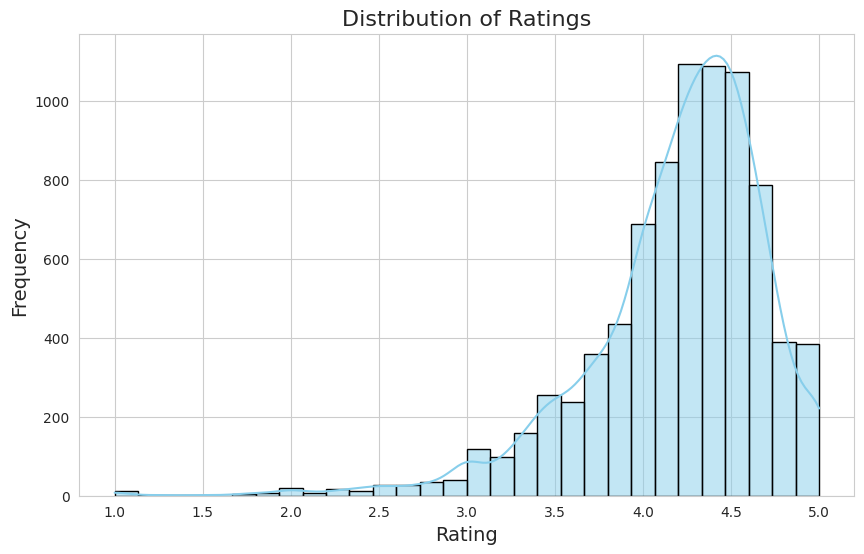

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_products['rating'], kde=True, bins=30, color='skyblue', edgecolor='black')

# title and label
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Impute missing values in 'rating' with the median since the histogram indicates a left-skewed distribution, meaning that it is more appropriate to impute missing values with the median rather than the mean. The median is less affected by outliers and skewed data, making it a better choice for imputation in this case.

In [ ]:
df_products['rating'] = df_products['rating'].fillna(df_products['rating'].median())

In [ ]:
df_products['reviews'].isna().sum()

0

### 1.2.2 Price

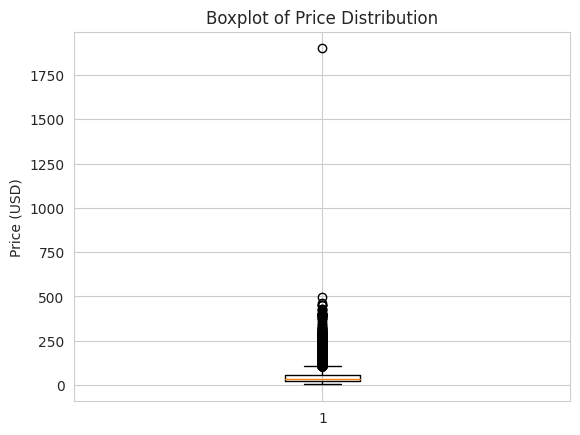

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df_products['price_usd'].dropna())

# Set the title and labels
plt.title('Boxplot of Price Distribution')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()


In [ ]:
df_products['price_usd'].max()

1900.0

We can drop this because it is clearly an outlier.

In [ ]:
df_products = df_products[df_products['price_usd'] < 1900]

### 1.2.3 Duplicates

In [ ]:
duplicates = df_products[df_products.duplicated(['product_name', 'brand_name'], keep=False)]
duplicates.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
897,P280544,Brilliantine,5995,Bumble and bumble,8738,4.2990,301.0,"['Water, Glycerin, Caprylic/Capric Triglycerid...",26.0,0,0,0,0,0,Unknown,Hair,Hair Styling & Treatments,Hair Styling Products,0
946,P425469,Brilliantine,5995,Bumble and bumble,2140,4.5000,10.0,"['Water, Glycerin, Caprylic/Capric Triglycerid...",26.0,0,0,0,0,0,Unknown,Mini Size,Hair,Unknown,0
1327,P415749,Body Fit Anti-Cellulite Contouring & Firming E...,2082,Clarins,18756,4.0385,52.0,"['Water, Alcohol, Glycerin, Butylene Glycol,Di...",77.0,0,0,0,0,0,"['Good for: Loss of firmness', 'Hydrating', 'W...",Bath & Body,Body Care,Cellulite & Stretch Marks,1
1340,P456195,Body Fit Anti-Cellulite Contouring & Firming E...,2082,Clarins,6074,3.5455,11.0,"['Water, Caprylic/Capric Triglyceride, Alcohol...",66.0,0,0,0,0,0,Unknown,Bath & Body,Body Care,Cellulite & Stretch Marks,0
1407,P122882,Clarifying Lotion 2,1254,CLINIQUE,38875,4.3815,1376.0,"['Water\\Aqua\\Eau, Alcohol Denat., Glycerin, ...",20.0,0,0,0,0,0,Unknown,Skincare,Cleansers,Toners,2


We checked for duplicates and found products that had the same product name and brand name but we realized that because the product and its mini / travel sized version are considered separate products on Sephora, they are not actually duplicates, as they have different features and different prices. So we will keep them.

### 1.2.4 Data Types

We can convert reviews from float to int as they contain whole numbers.



In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   loves_count         8493 non-null   int64  
 5   rating              8493 non-null   float64
 6   reviews             8493 non-null   float64
 7   ingredients         8493 non-null   object 
 8   price_usd           8493 non-null   float64
 9   limited_edition     8493 non-null   int64  
 10  new                 8493 non-null   int64  
 11  online_only         8493 non-null   int64  
 12  out_of_stock        8493 non-null   int64  
 13  sephora_exclusive   8493 non-null   int64  
 14  highlights          8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  second

In [ ]:
df_products['reviews'] = df_products['reviews'].astype('int64')

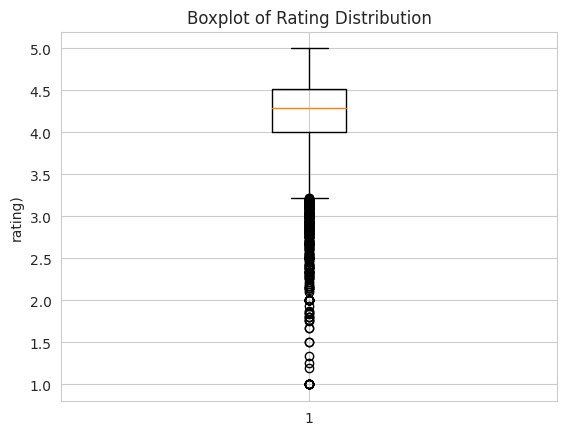

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df_products['rating'].dropna())

# Set the title and labels
plt.title('Boxplot of Rating Distribution')
plt.ylabel('rating)')

# Show the plot
plt.show()

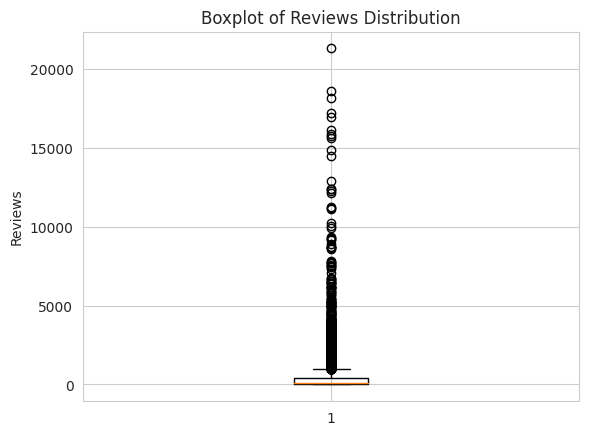

In [ ]:
# Create a boxplot
plt.boxplot(df_products['reviews'].dropna())

# Set the title and labels
plt.title('Boxplot of Reviews Distribution')
plt.ylabel('Reviews')

# Show the plot
plt.show()

In [ ]:
df_products[df_products['reviews'] > 20000] #investigation of the outlier

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
4250,P245205,Tattoo Liner Vegan Waterproof Liquid Eyeliner,5905,KVD Beauty,566585,4.131,21281,"['Water, Ammonium Styrene/Acrylates Copolymer,...",25.0,0,0,0,0,0,"['Vegan', 'Community Favorite', ""allure 2018 R...",Makeup,Eye,Eyeliner,3


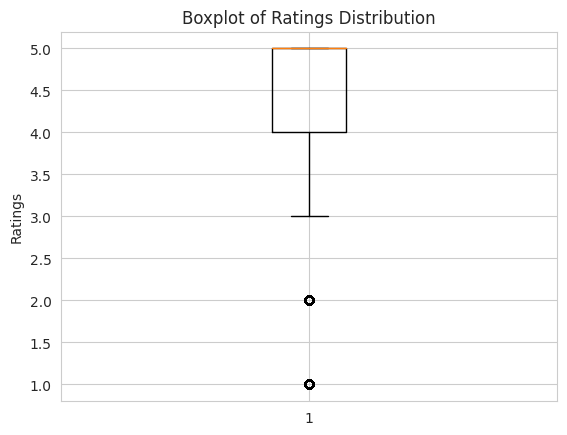

In [ ]:
# Create a boxplot
plt.boxplot(df_reviews['rating'].dropna())

# Set the title and labels
plt.title('Boxplot of Ratings Distribution')
plt.ylabel('Ratings')

# Show the plot
plt.show()

In [ ]:
df_reviews['rating'].value_counts()

5    698951
4    199389
3     81816
1     61223
2     53032
Name: rating, dtype: int64

In [ ]:
df_reviews['submission_time'] = pd.to_datetime(df_reviews['submission_time'])

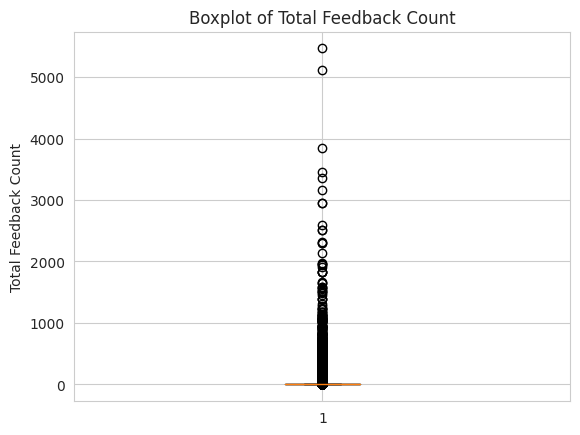

In [ ]:
# Create a boxplot
plt.boxplot(df_reviews['total_feedback_count'].dropna())

# Set the title and labels
plt.title('Boxplot of Total Feedback Count')
plt.ylabel('Total Feedback Count')

# Show the plot
plt.show()

In [ ]:
df_reviews['skin_tone'].value_counts()

light          266418
fair           208034
lightMedium    196541
Unknown        170539
medium          70486
mediumTan       62456
fairLight       56228
tan             33678
deep            20601
rich             5493
olive            1730
porcelain        1612
dark              522
notSureST          70
ebony               3
Name: skin_tone, dtype: int64

In [ ]:
df_reviews['author_id'].value_counts()

1696370280     234
1288462295     171
5060164185     132
2330399812     131
7375781965     130
              ... 
35785194231      1
34116589282      1
38362244649      1
37964060718      1
5595682861       1
Name: author_id, Length: 578653, dtype: int64

In [ ]:
df_reviews[df_reviews['author_id'] == '1696370280'].sort_values(by='submission_time').head(2)

,author_id,rating,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
73995,1696370280,5,2,0,2,2020-12-30,I love using this in conjunction with the blue...,amazing product,light,brown,combination,black,P400203,Lapis Blue Tansy Face Oil - For Oily & Acne-Pr...,Herbivore,74.0
519865,1696370280,5,2,1,1,2020-12-30,"I love this cleanser, and this entire line of ...",Love the tingle!,light,brown,combination,black,P416815,Find Your Balance Oil Control Cleanser,OLEHENRIKSEN,33.0


# 2. EDA

## Products EDA

In [ ]:
from tabulate import tabulate

# Calculate basic statistics for numerical features in product_data
statistics = df_products[['loves_count', 'rating', 'reviews', 'price_usd']].describe()

# Convert the DataFrame to a list of lists for tabulation
statistics_table = statistics.reset_index().values.tolist()

# Tabulate the statistics with a prettier format
table_headers = ["Statistic", "Loves Count", "Rating", "Reviews", "Price (USD)"]
print(tabulate(statistics_table, headers=table_headers, tablefmt="pretty", numalign="right"))

+-----------+--------------------+--------------------+--------------------+-------------------+
| Statistic |    Loves Count     |       Rating       |      Reviews       |    Price (USD)    |
+-----------+--------------------+--------------------+--------------------+-------------------+
|   count   |       8493.0       |       8493.0       |       8493.0       |      8493.0       |
|   mean    | 29182.512539738607 |  4.19766951607206  | 433.9156952784646  | 51.43796302837631 |
|    std    | 66095.45594661623  | 0.5084544258376316 | 1086.7857434631494 | 49.78326214736252 |
|    min    |        0.0         |        1.0         |        0.0         |        3.0        |
|    25%    |       3758.0       |        4.0         |        22.0        |       25.0        |
|    50%    |       9881.0       | 4.289350000000001  |       112.0        |       35.0        |
|    75%    |      26859.0       |       4.5225       |       402.0        |       58.0        |
|    max    |     1401068.0   

The statistics for the numerical features in the product dataset reveal interesting insights. On average, products have approximately 29,180 loves, a rating of around 4.20, 434 reviews, and are priced at 51.66. However, there is significant variability in these metrics, with loves_count ranging from 0 to over 1.4 million, ratings ranging from 1 to 5, reviews ranging from 0 to over 21,000, and prices ranging from 3 to 1,900.

In [ ]:
# Check the distribution of categorical variables in product_data
df_products[['limited_edition', 'online_only', 'out_of_stock', 'sephora_exclusive']].apply(pd.Series.value_counts)

,limited_edition,online_only,out_of_stock,sephora_exclusive
0,7896,6633,7867,6121
1,597,1860,626,2372


Limited Edition: Out of 8,494 products, 597 are classified as limited edition, indicating that a relatively small proportion of products fall into this category.

Online Only: A significant portion of products, 1,861 out of 8,494, are available exclusively online, suggesting that Sephora offers a substantial selection of products that can only be purchased through their online platform.

Out of Stock: Among the products in the dataset, 626 are currently out of stock, indicating that a portion of the products may not be readily available for purchase at the time of data collection.

Sephora Exclusive: Approximately 2,373 products are identified as exclusive to Sephora, suggesting that a considerable number of products are unique to Sephora's offerings, potentially serving as a competitive advantage in attracting customers to the platform.

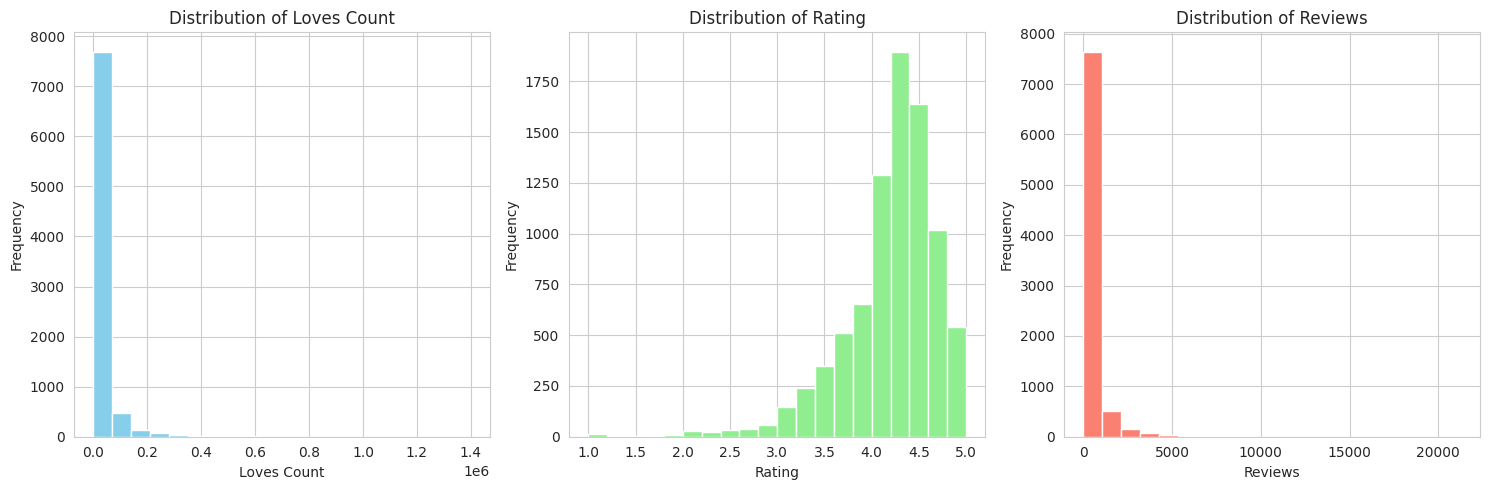

Top 10 Popular Products:
                                           product_name  loves_count
6242                            Soft Pinch Liquid Blush      1401068
5249                           Radiant Creamy Concealer      1153594
4431  Lip Sleeping Mask Intense Hydration with Vitam...      1081315
6434                    Cream Lip Stain Liquid Lipstick      1029051
2523                 Gloss Bomb Universal Lip Luminizer       968317
2524   Pro Filt’r Soft Matte Longwear Liquid Foundation       856497
5250                                              Blush       840076
247           Brow Wiz Ultra-Slim Precision Brow Pencil       834189
4458                   Translucent Loose Setting Powder       813497
7648        Niacinamide 10% + Zinc 1% Oil Control Serum       763168

Top 10 Highly Rated Products:
                                          product_name  rating
44                      Aperitivo In Terrazza Diffuser     5.0
128  Liquid Gold Midnight Reboot Serum with 14% Gly...     

In [ ]:
# Distribution exploration
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of loves_count
axs[0].hist(df_products['loves_count'], bins=20, color='skyblue')
axs[0].set_title('Distribution of Loves Count')
axs[0].set_xlabel('Loves Count')
axs[0].set_ylabel('Frequency')

# Distribution of rating
axs[1].hist(df_products['rating'], bins=20, color='lightgreen')
axs[1].set_title('Distribution of Rating')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')

# Distribution of reviews
axs[2].hist(df_products['reviews'], bins=20, color='salmon')
axs[2].set_title('Distribution of Reviews')
axs[2].set_xlabel('Reviews')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Identify popular products based on loves_count
popular_products = df_products.nlargest(10, 'loves_count')[['product_name', 'loves_count']]
print("Top 10 Popular Products:")
print(popular_products)

# Identify highly rated products based on rating
highly_rated_products = df_products.nlargest(10, 'rating')[['product_name', 'rating']]
print("\nTop 10 Highly Rated Products:")
print(highly_rated_products)

The top 10 most loved products are predominantly makeup items, including blush, concealer, lipstick, and foundation. Among them, the Soft Pinch Liquid Blush stands out with the highest loves_count, indicating its popularity among customers. On the other hand, the top 10 highly rated products feature a diverse range of items, from skincare to fragrance, suggesting a broader appeal across different product categories. These products have all received a perfect rating of 5.0, indicating exceptional customer satisfaction and quality.

<ipython-input-48-657d9206004f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


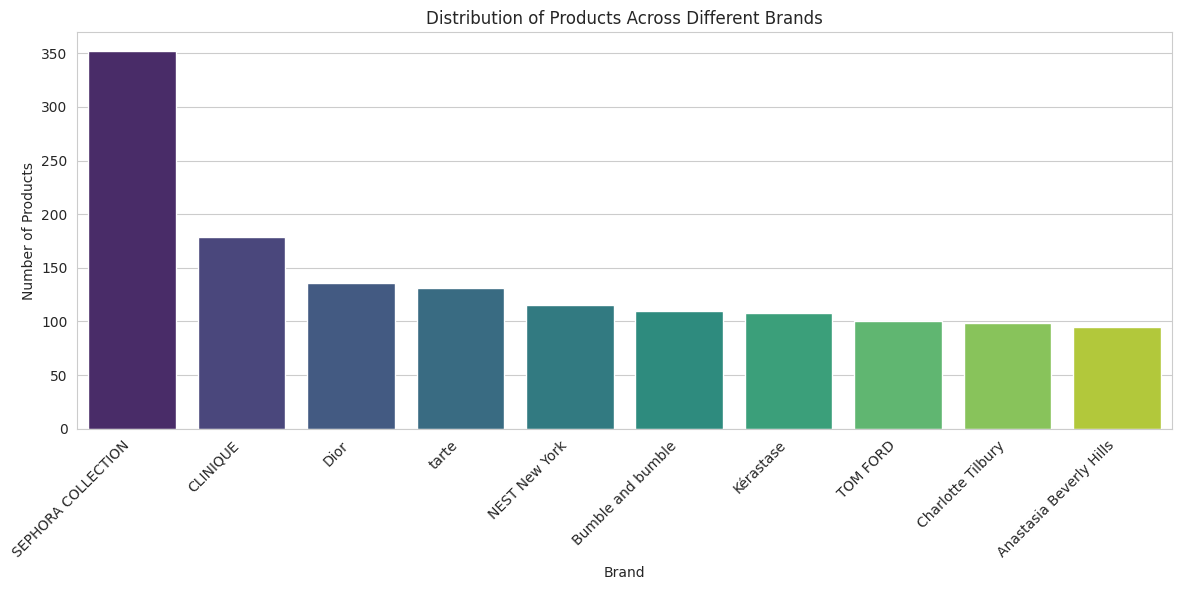

In [ ]:
# Distribution of products across different brands
plt.figure(figsize=(12, 6))
brand_counts = df_products['brand_name'].value_counts().nlargest(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Distribution of Products Across Different Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify popular brands based on the number of products
print("Top 10 Popular Brands Based on Number of Products:")
print(brand_counts)

# Identify popular brands based on overall rating
brand_rating = df_products.groupby('brand_name')['rating'].mean().nlargest(10)
print("\nTop 10 Popular Brands Based on Overall Rating:")
print(brand_rating)



The top 10 popular brands based on the number of products are predominantly well-known names in the beauty industry, with Sephora Collection leading by a significant margin. Conversely, the top 10 popular brands based on overall rating feature lesser-known or niche brands like Aquis, Macrene Actives, and Mara, indicating that smaller brands can still achieve high levels of customer satisfaction and loyalty. This suggests that consumers are increasingly valuing quality and efficacy over brand recognition alone.

Top 10 Popular Brands Based on Number of Products:
SEPHORA COLLECTION         352
CLINIQUE                   179
Dior                       136
tarte                      131
NEST New York              115
Bumble and bumble          110
Kérastase                  108
TOM FORD                   100
Charlotte Tilbury           99
Anastasia Beverly Hills     95
Name: brand_name, dtype: int64

Top 10 Popular Brands Based on Overall Rating:
brand_name
Aquis                  4.904800
MACRENE actives        4.889420
MARA                   4.823860
CANOPY                 4.813733
DOMINIQUE COSMETICS    4.785700
BondiBoost             4.776950
Erno Laszlo            4.763117
DAMDAM                 4.752775
Kate McLeod            4.751583
maude                  4.740100
Name: rating, dtype: float64


<ipython-input-49-8834d4dc83ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_category_counts.index, y=primary_category_counts.values, palette='viridis')


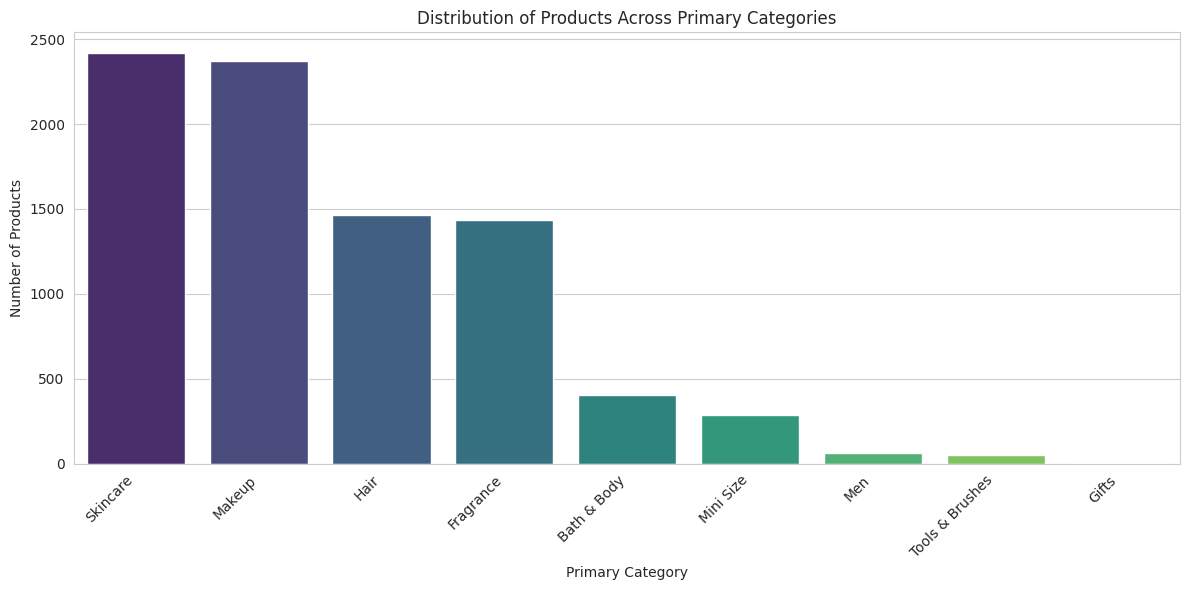

<ipython-input-49-8834d4dc83ad>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=secondary_category_counts.index, y=secondary_category_counts.values, palette='viridis')


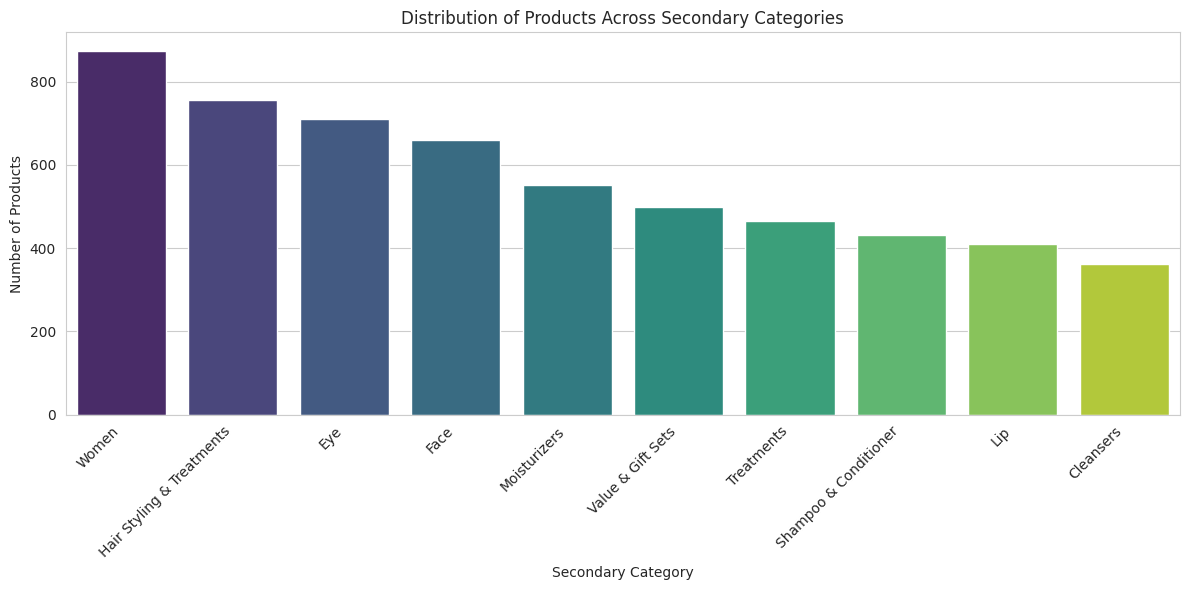

<ipython-input-49-8834d4dc83ad>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tertiary_category_counts.index, y=tertiary_category_counts.values, palette='viridis')


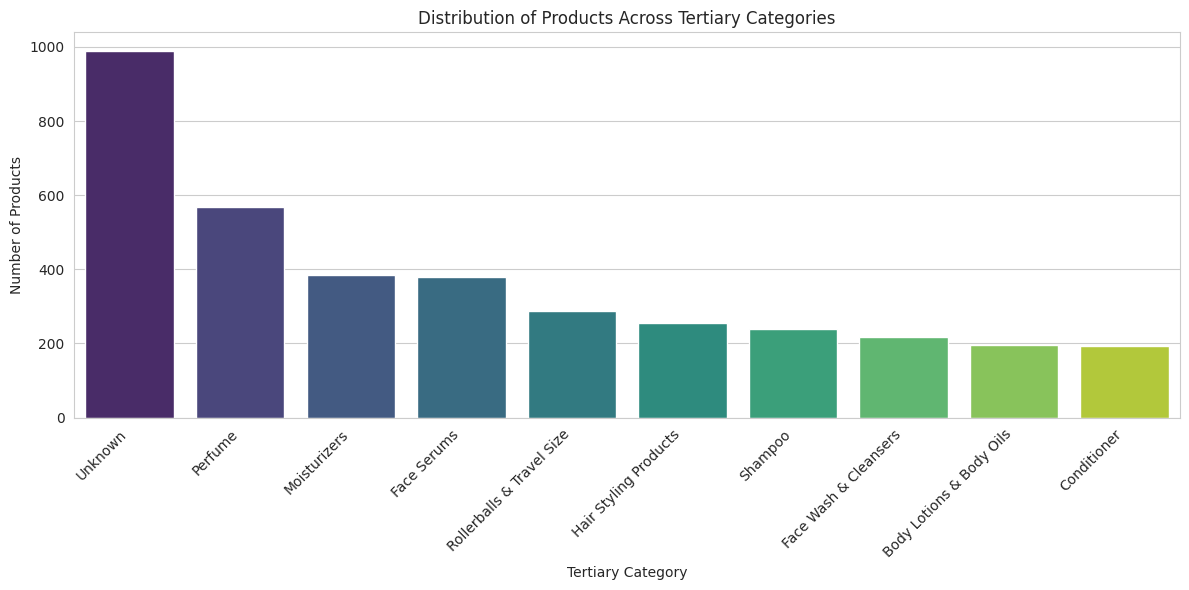

Top 10 Most Common Primary Categories:
Skincare           2419
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

Top 10 Most Common Secondary Categories:
Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Name: secondary_category, dtype: int64

Top 10 Most Common Tertiary Categories:
Unknown                      990
Perfume                      568
Moisturizers                 386
Face Serums                  379
Rollerballs & Travel Size    287
Hair Styling Products        255
Shampoo                      238
Face Wash & Cleansers    

<ipython-input-49-8834d4dc83ad>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_primary_category.index, y=avg_rating_by_primary_category.values, palette='muted')


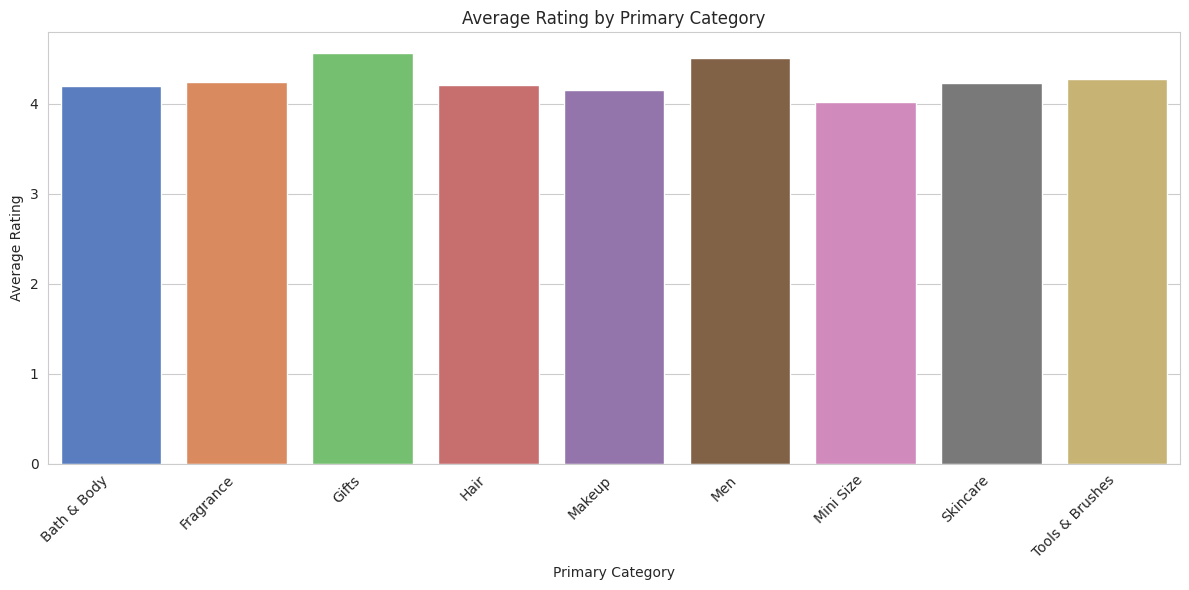

<ipython-input-49-8834d4dc83ad>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_primary_category.index, y=avg_price_by_primary_category.values, palette='muted')


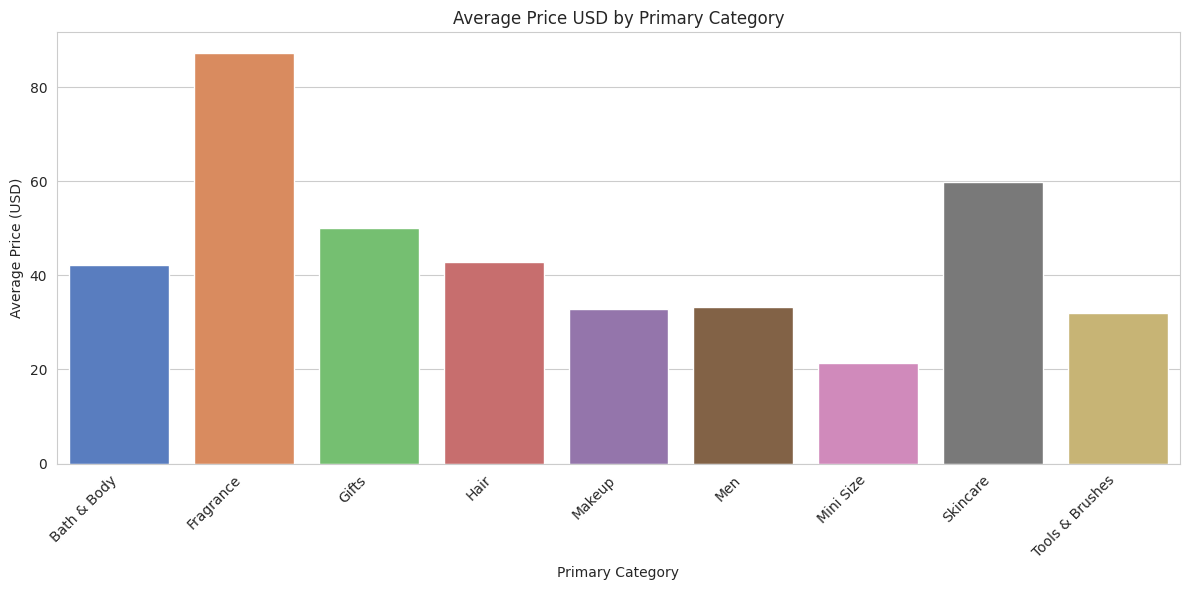

In [ ]:
# Distribution of products across primary categories
plt.figure(figsize=(12, 6))
primary_category_counts = df_products['primary_category'].value_counts().nlargest(10)
sns.barplot(x=primary_category_counts.index, y=primary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Primary Categories')
plt.xlabel('Primary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of products across secondary categories
plt.figure(figsize=(12, 6))
secondary_category_counts = df_products['secondary_category'].value_counts().nlargest(10)
sns.barplot(x=secondary_category_counts.index, y=secondary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Secondary Categories')
plt.xlabel('Secondary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of products across tertiary categories
plt.figure(figsize=(12, 6))
tertiary_category_counts = df_products['tertiary_category'].value_counts().nlargest(10)
sns.barplot(x=tertiary_category_counts.index, y=tertiary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Tertiary Categories')
plt.xlabel('Tertiary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the most common categories
print("Top 10 Most Common Primary Categories:")
print(primary_category_counts)
print("\nTop 10 Most Common Secondary Categories:")
print(secondary_category_counts)
print("\nTop 10 Most Common Tertiary Categories:")
print(tertiary_category_counts)

# Analyze average rating and price_usd by primary category
avg_rating_by_primary_category = df_products.groupby('primary_category')['rating'].mean()
avg_price_by_primary_category = df_products.groupby('primary_category')['price_usd'].mean()

# Plot average rating by primary category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_primary_category.index, y=avg_rating_by_primary_category.values, palette='muted')
plt.title('Average Rating by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot average price_usd by primary category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_primary_category.index, y=avg_price_by_primary_category.values, palette='muted')
plt.title('Average Price USD by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The top 10 most common primary categories include Skincare and Makeup, indicating that these are the most prevalent product types available. In secondary categories, Women's products are the most common, followed by categories like Hair Styling & Treatments and Eye products. Tertiary categories reveal that Perfume and Moisturizers are highly represented, while Rollerballs & Travel Size and Hair Styling Products also have a significant presence. This distribution suggests a diverse range of offerings catering to various beauty needs and preferences.

On average, Gifts have the highest rating out of the primary categories. And Fragrance has a distinctly higher price than other primary categories on average.

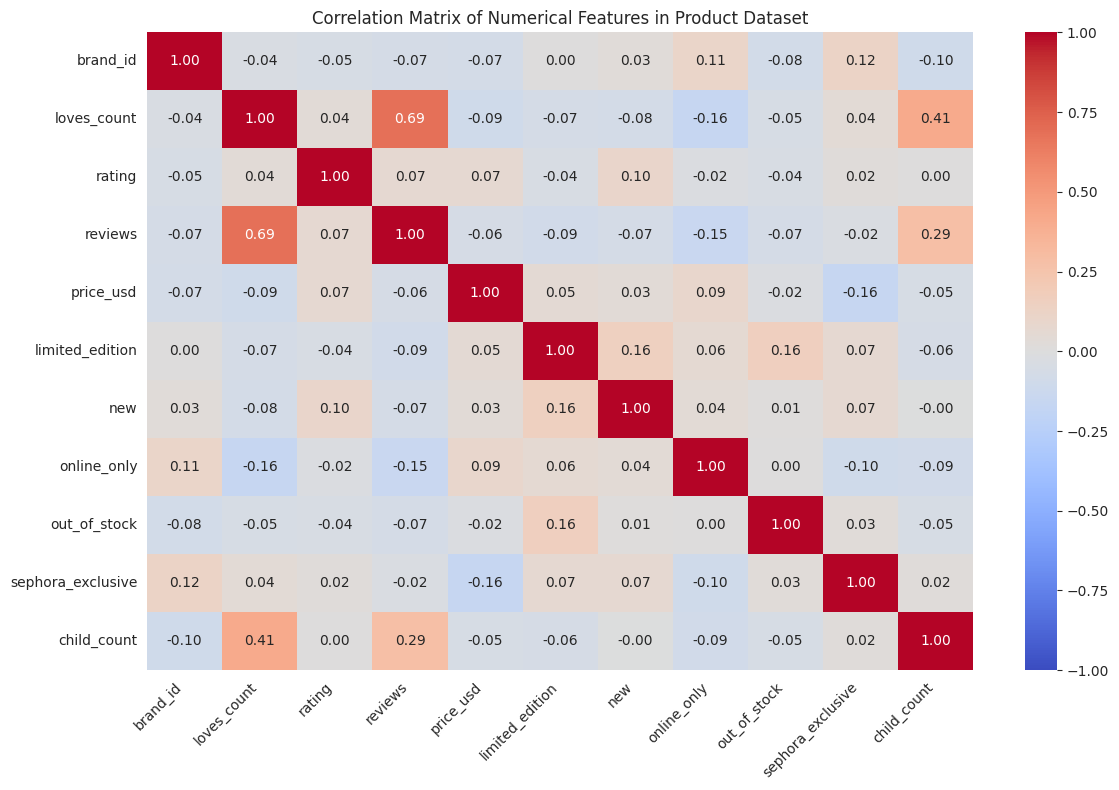

In [ ]:
# Select numerical features from the product dataset
numerical_features = df_products.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features in Product Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The relatively high correlation between loves_count and reviews suggests that there is a strong relationship between the number of people marking a product as a favorite (loves_count) and the number of user reviews the product receives. This correlation implies that products with more favorites tend to also have more reviews, indicating that higher levels of user engagement, interest, and satisfaction may lead to increased review activity. In other words, when customers love a product, they are more likely to leave reviews about it, contributing to a higher number of overall reviews for that product.

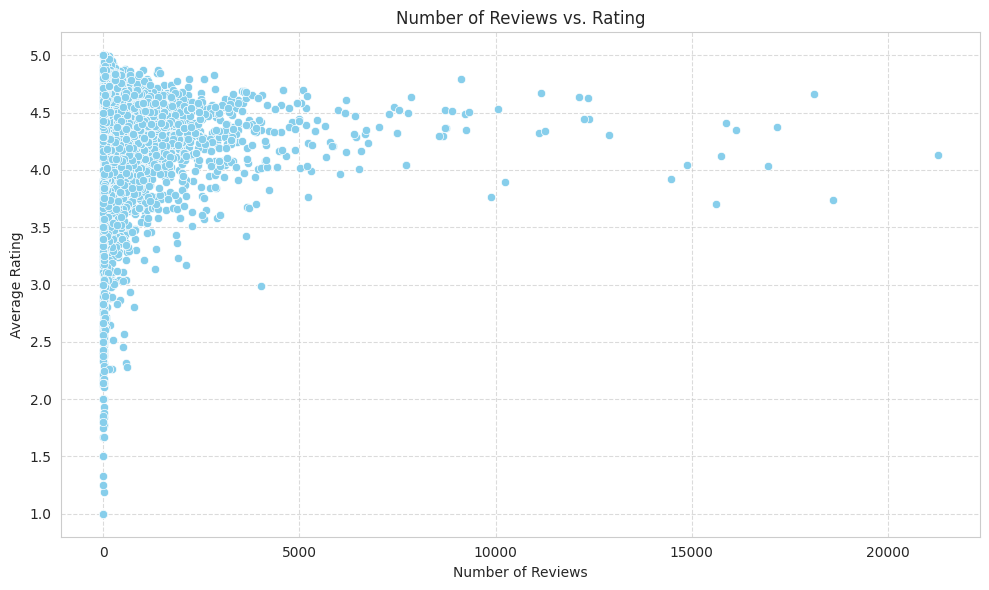

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews', y='rating', data=df_products, color='skyblue')
plt.title('Number of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There seems to be no correlation between reviews and popularity. However, there is more ratings when for low number of reviews.

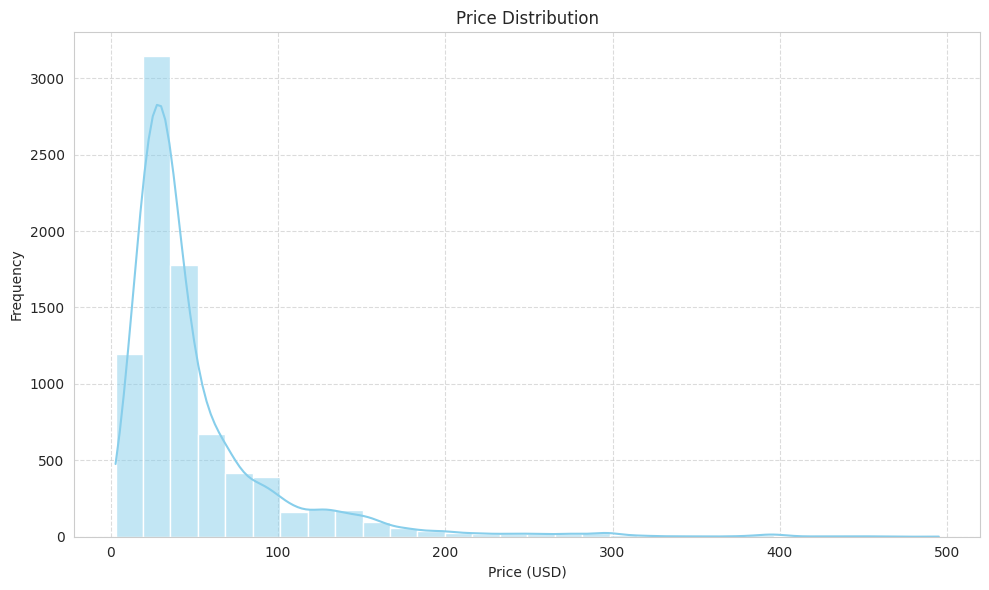

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_products['price_usd'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The price distribution seems to be skewed right with most products being under 100 dollars. This makes sense as Sephora mostly sells skincare and makeup products and a little bit over 100 dollar is the typical range.

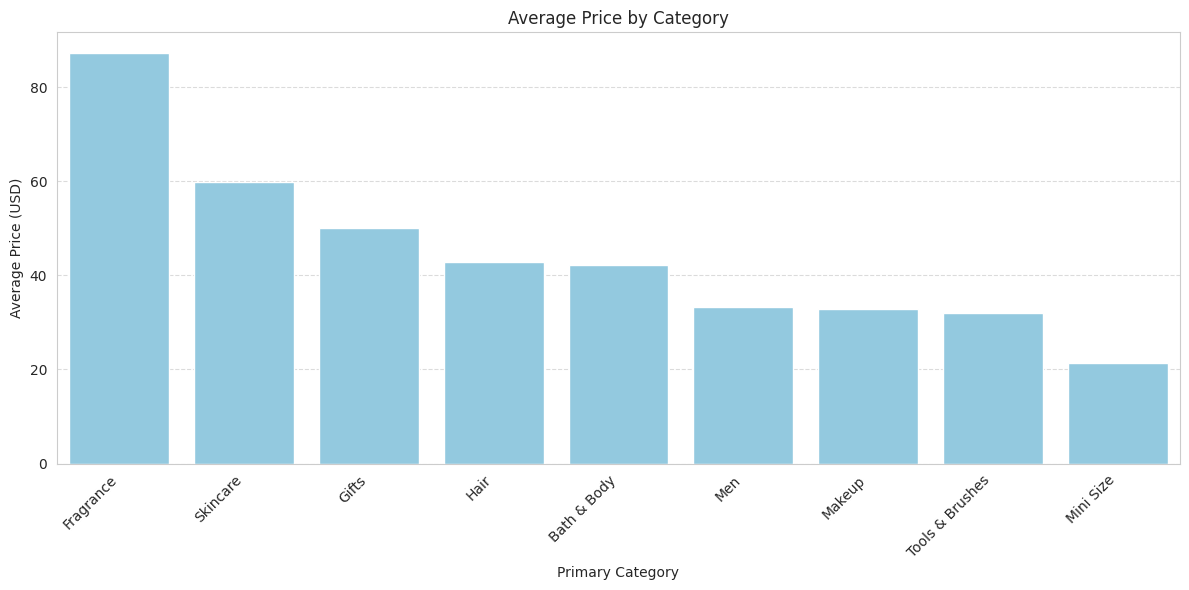

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average price by primary category
average_price_by_category = df_products.groupby('primary_category')['price_usd'].mean().reset_index()

# Sort the dataframe by average price in descending order
average_price_by_category = average_price_by_category.sort_values(by='price_usd', ascending=False)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_category', y='price_usd', data=average_price_by_category, color='skyblue')
plt.title('Average Price by Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The results above are similar to what one would expect. Fragrances, skincare usually have a higher price point than makeup tools and travel size products.

<Figure size 1200x800 with 0 Axes>

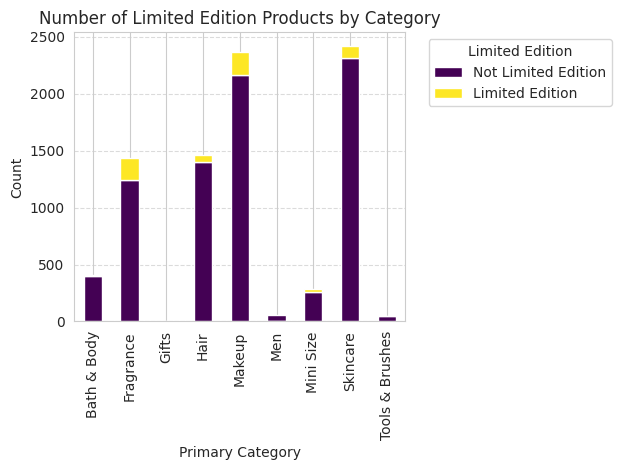

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of limited edition products by category
limited_edition_by_category = df_products.groupby(['primary_category', 'limited_edition']).size().unstack(fill_value=0)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
limited_edition_by_category.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Limited Edition Products by Category')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Limited Edition', labels=['Not Limited Edition', 'Limited Edition'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The makeup and fragrance categories seem to have more limited edition products but hair and skincare also have some exclusive products.

<Figure size 1200x800 with 0 Axes>

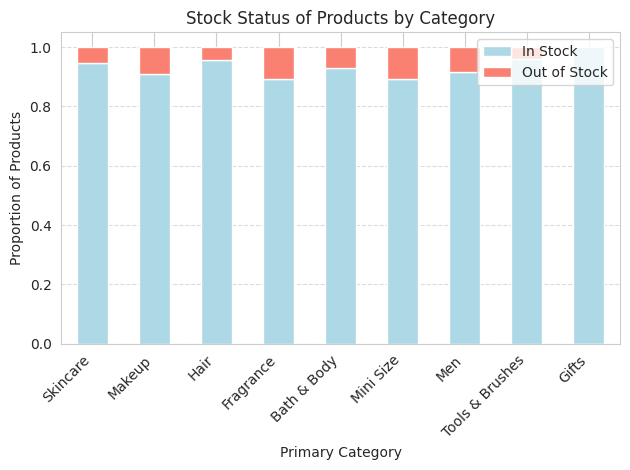

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by primary category and count the number of products in and out of stock in each category
stock_status_by_category = df_products.groupby('primary_category')['out_of_stock'].value_counts(normalize=True).unstack(fill_value=0)

# Reorder categories by the total number of products
category_order = df_products['primary_category'].value_counts().index

# Plotting the stacked bar chart using Seaborn
plt.figure(figsize=(12, 8))
stock_status_by_category.loc[category_order].plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Stock Status of Products by Category')
plt.xlabel('Primary Category')
plt.ylabel('Proportion of Products')
plt.xticks(rotation=45, ha='right')
plt.legend(['In Stock', 'Out of Stock'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Fragrance, Makeup and Mini Size are the top 3 categories with the most out of stock products.

<ipython-input-56-c90d4e7f446a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand_name', y='exclusive_count', data=top_10_exclusive_brands, palette='pastel')


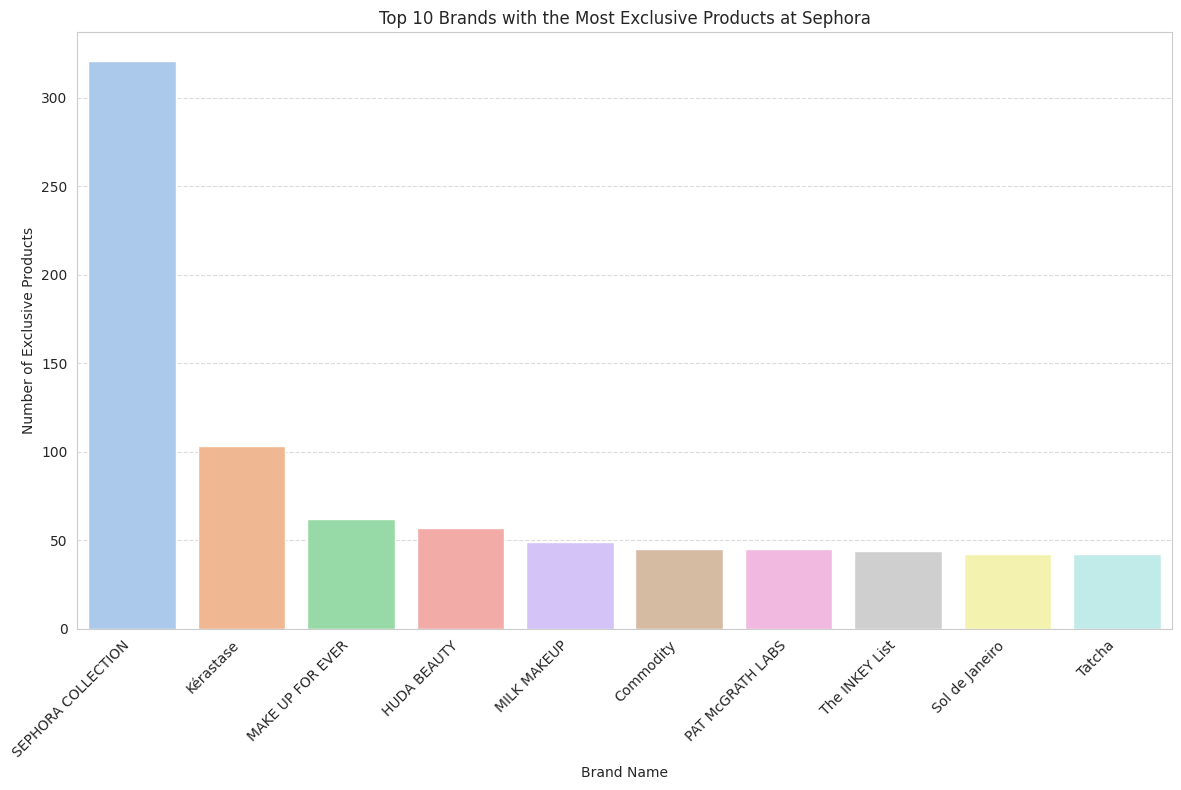

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by brand name and count the number of products that are exclusive to Sephora for each brand
exclusive_products_by_brand = df_products[df_products['sephora_exclusive'] == 1].groupby('brand_name').size().reset_index(name='exclusive_count')

# Sort the dataframe by the count of exclusive products in descending order and select the top 10 brands
top_10_exclusive_brands = exclusive_products_by_brand.nlargest(10, 'exclusive_count')

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='brand_name', y='exclusive_count', data=top_10_exclusive_brands, palette='pastel')

plt.title('Top 10 Brands with the Most Exclusive Products at Sephora')
plt.xlabel('Brand Name')
plt.ylabel('Number of Exclusive Products')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The graph above shows that Sephora carries renowned brands such as Kerastase, Sol de Janeiro, and Huda Beauty which makes it competitive in its industry.

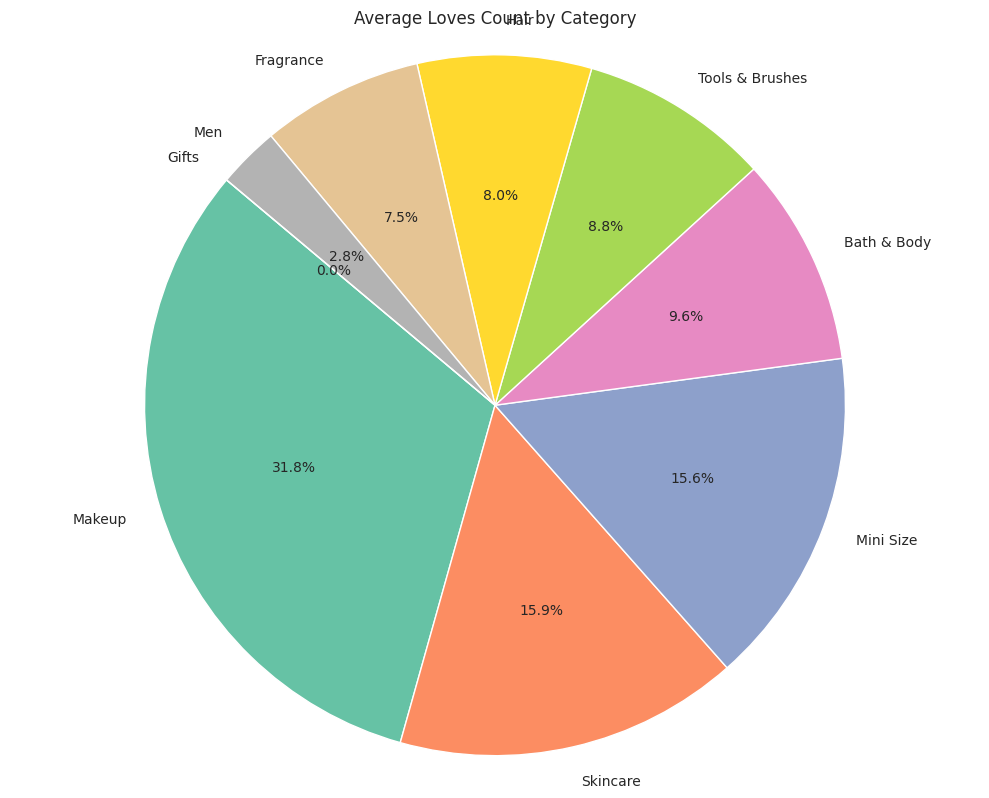

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average loves count by category
average_loves_by_category = df_products.groupby('primary_category')['loves_count'].mean().reset_index()

# Sort the dataframe by the average loves count in descending order
average_loves_by_category = average_loves_by_category.sort_values(by='loves_count', ascending=False)

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(average_loves_by_category['loves_count'], labels=average_loves_by_category['primary_category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

plt.title('Average Loves Count by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Makeup, skincare, and travel size products have more love counts than some categories such as gift, men, and fragrance.

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate
# Assuming df_products is your DataFrame containing product information

# Filter the DataFrame to include only limited edition products
limited_edition_products = df_products[df_products['limited_edition'] == 1]

# Sort the limited edition products by rating (change to another metric if needed)
top_limited_edition_products = limited_edition_products.sort_values(by='rating', ascending=False)

# Display information about the top limited edition products
top_limited_edition_products_info = top_limited_edition_products[['product_name', 'brand_name', 'rating', 'price_usd']]


# Display information about the top limited edition products as a table without the index column
print(tabulate(top_limited_edition_products_info, headers='keys', tablefmt='pretty', showindex=False))


+--------------------------------------------------------------------------------------+------------------------------+-------------------+-----------+
|                                     product_name                                     |          brand_name          |      rating       | price_usd |
+--------------------------------------------------------------------------------------+------------------------------+-------------------+-----------+
|                                  Daisy Perfume Set                                   |    Marc Jacobs Fragrances    |        5.0        |   75.0    |
|                      Mask and Moisturize Duo Skincare Gift Set                       |      Kiehl's Since 1851      |        5.0        |   30.0    |
|                            Mini Perfume Icons Sampler Set                            |         KILIAN Paris         |        5.0        |   30.0    |
|                         Dive Into Hydration Head-to-Toe Set                          |

Most of the out of stock products are fragrances, limited edition sets that appeared in the table for limited edition products and items from popular makeup brands which probably sold out fast.

In [ ]:
from tabulate import tabulate

# Group by category and calculate minimum, maximum, and average price
price_range_by_category = df_products.groupby('primary_category').agg(
    min_price=('price_usd', 'min'),
    max_price=('price_usd', 'max'),
    avg_price=('price_usd', 'mean')
).reset_index()

# Display price range by category as a table using tabulate
print(tabulate(price_range_by_category, headers='keys', tablefmt='grid', showindex=False))

+--------------------+-------------+-------------+-------------+
| primary_category   |   min_price |   max_price |   avg_price |
+====================+=============+=============+=============+
| Bath & Body        |        3    |         300 |     42.2333 |
+--------------------+-------------+-------------+-------------+
| Fragrance          |       10    |         395 |     87.2626 |
+--------------------+-------------+-------------+-------------+
| Gifts              |       50    |          50 |     50      |
+--------------------+-------------+-------------+-------------+
| Hair               |        5    |         399 |     42.7867 |
+--------------------+-------------+-------------+-------------+
| Makeup             |        3    |         320 |     32.758  |
+--------------------+-------------+-------------+-------------+
| Men                |       10    |         104 |     33.2    |
+--------------------+-------------+-------------+-------------+
| Mini Size          |   

This table shows that all categories except gifts tend to have a wide price range.

## Reviews EDA

In [ ]:
# Calculate basic statistics for numerical features in reviews_data
df_reviews[['rating']].describe()

,rating
count,1.094411e+06
mean,4.299158e+00
std,1.149444e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00



The statistics for the rating feature in the reviews dataset indicate that, on average, products are highly rated at around 4.30. The majority of ratings fall within the range of 4 to 5, with the median rating being 5. This suggests that most products receive positive ratings from users, contributing to the overall high average rating observed.

<ipython-input-62-f88fcc56a176>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='brand_name', data=top_10_brands, palette='viridis')


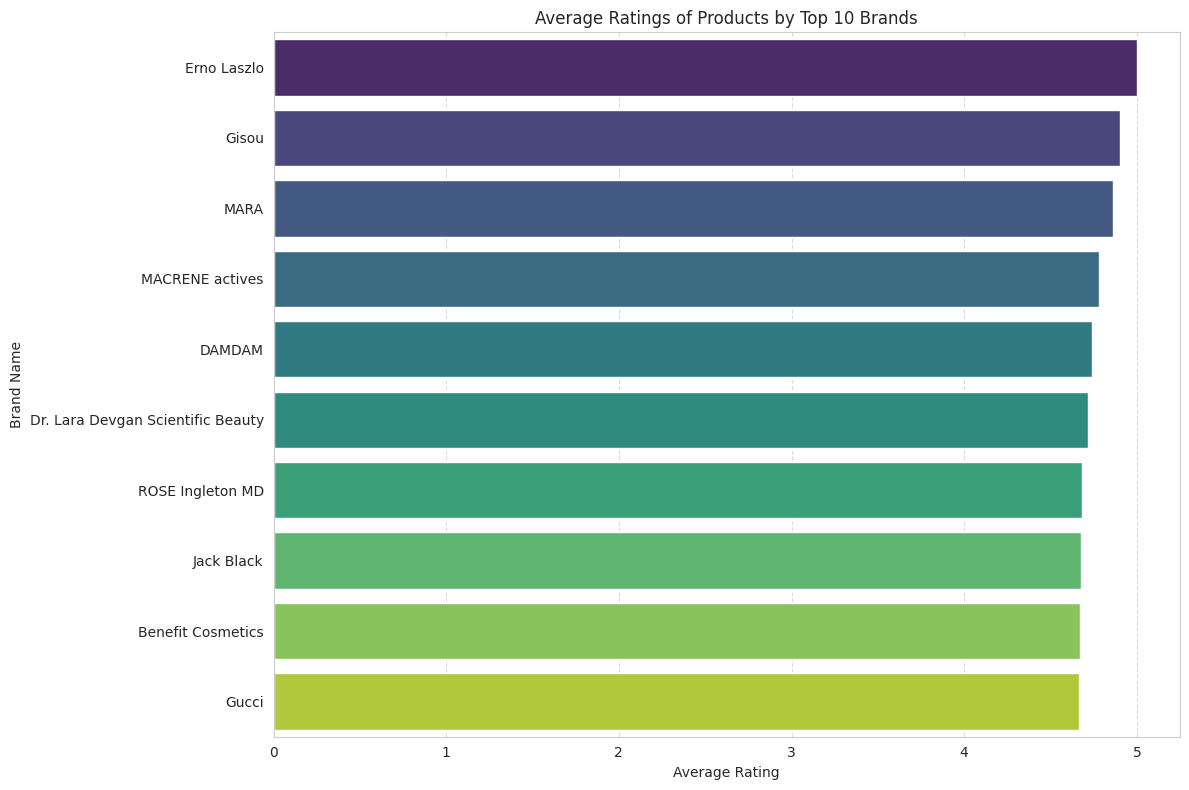

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average rating by brand
average_rating_by_brand = df_reviews.groupby('brand_name')['rating'].mean().reset_index()

# Sort the dataframe by the average rating in descending order and select the top 10 brands
top_10_brands = average_rating_by_brand.sort_values(by='rating', ascending=False).head(10)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='brand_name', data=top_10_brands, palette='viridis')

plt.title('Average Ratings of Products by Top 10 Brands')
plt.xlabel('Average Rating')
plt.ylabel('Brand Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The brands with the highest average ratings (5 for all) were all skincare, luxury and renowned make up brands. As reputable brands it is not surprising that they are highly rated by customers.

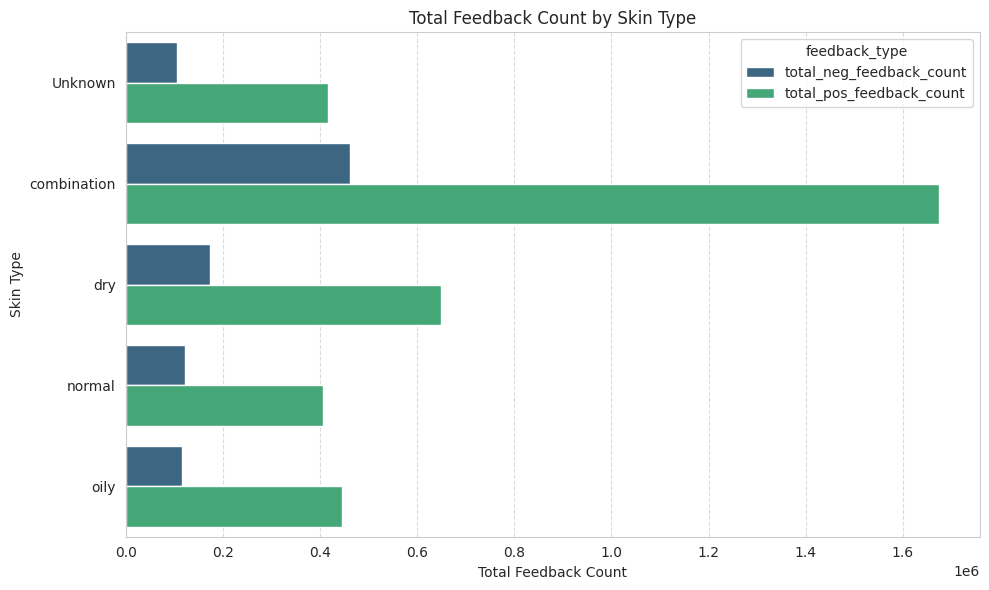

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total feedback count by skin type
df_reviews['total_feedback_count'] = df_reviews['total_neg_feedback_count'] + df_reviews['total_pos_feedback_count']
total_feedback_by_skin_type = df_reviews.groupby('skin_type').agg({
    'total_neg_feedback_count': 'sum',
    'total_pos_feedback_count': 'sum'
}).reset_index()

# Melt the dataframe to long format
total_feedback_by_skin_type = total_feedback_by_skin_type.melt(id_vars='skin_type', var_name='feedback_type', value_name='feedback_count')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='feedback_count', y='skin_type', hue='feedback_type', data=total_feedback_by_skin_type, palette='viridis')

plt.title('Total Feedback Count by Skin Type')
plt.xlabel('Total Feedback Count')
plt.ylabel('Skin Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph above shows that most skin types have more positive feedback than negtive ones. This may imply that Sephora generally does well in catering to the needs of different types of skin. However, combination skin has the highest negative feedback and it may be good to explore why customers are not satisfied.

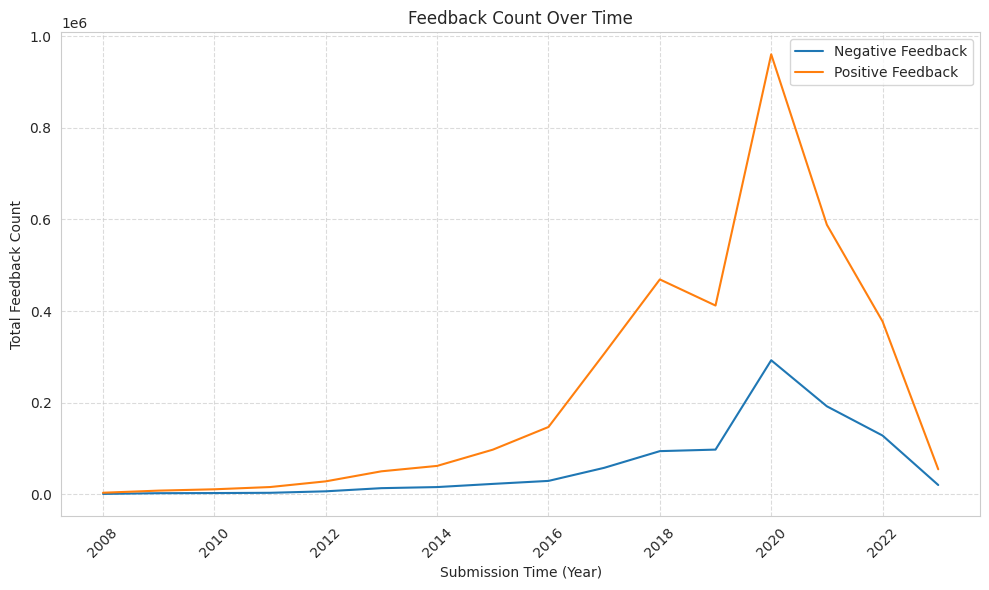

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_reviews is your DataFrame containing review data

# Convert 'total_feedback_count', 'total_neg_feedback_count', and 'total_pos_feedback_count' to numeric, coercing errors to NaN
df_reviews['total_feedback_count'] = pd.to_numeric(df_reviews['total_feedback_count'], errors='coerce')
df_reviews['total_neg_feedback_count'] = pd.to_numeric(df_reviews['total_neg_feedback_count'], errors='coerce')
df_reviews['total_pos_feedback_count'] = pd.to_numeric(df_reviews['total_pos_feedback_count'], errors='coerce')

# Drop rows with NaN values in relevant columns
df_reviews.dropna(subset=['total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count'], inplace=True)

# Extract year from 'submission_time'
df_reviews['submission_year'] = df_reviews['submission_time'].dt.year

# Create a new DataFrame to store aggregated total, positive, and negative feedback counts over time
total_feedback_over_time = df_reviews.groupby('submission_year').agg({
    'total_feedback_count': 'sum',
    'total_neg_feedback_count': 'sum',
    'total_pos_feedback_count': 'sum'
}).reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='submission_year', y='total_neg_feedback_count', data=total_feedback_over_time, label='Negative Feedback')
sns.lineplot(x='submission_year', y='total_pos_feedback_count', data=total_feedback_over_time, label='Positive Feedback')

plt.title('Feedback Count Over Time')
plt.xlabel('Submission Time (Year)')
plt.ylabel('Total Feedback Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


The trend above highlights Sephora's improvement as the gap between positive and negative reviews widen throughout the years.

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming df_reviews is your DataFrame containing review data

# Grouping by brand and aggregating product attributes
brand_attributes = df_reviews.groupby('brand_name').agg({
    'skin_tone': lambda x: x.value_counts().index[0] if not x.empty else None,
    'eye_color': lambda x: x.value_counts().index[0] if not x.empty else None,
    'skin_type': lambda x: x.value_counts().index[0] if not x.empty else None,
    'hair_color': lambda x: x.value_counts().index[0] if not x.empty else None
}).reset_index()

# Using tabulate to display the DataFrame in a tabular format
print(tabulate(brand_attributes, headers='keys', tablefmt='psql'))

+-----+-----------------------------------+-------------+-------------+-------------+--------------+
|     | brand_name                        | skin_tone   | eye_color   | skin_type   | hair_color   |
|-----+-----------------------------------+-------------+-------------+-------------+--------------|
|   0 | Algenist                          | Unknown     | brown       | combination | brown        |
|   1 | Alpha-H                           | light       | brown       | combination | brown        |
|   2 | Anastasia Beverly Hills           | lightMedium | brown       | combination | black        |
|   3 | Augustinus Bader                  | light       | brown       | combination | brown        |
|   4 | BeautyBio                         | light       | brown       | combination | brown        |
|   5 | Benefit Cosmetics                 | Unknown     | brown       | combination | Unknown      |
|   6 | Biossance                         | light       | brown       | combination | brown

This table shows some brand attributes and could be used to determine if a brand is inclusive.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_products = ['loves_count', 'rating', 'reviews', 'price_usd', 'child_count']
numerical_reviews = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']

normalized_products = scaler.fit_transform(df_products[numerical_products])
df_products[numerical_products] = normalized_products

normalized_reviews = scaler.fit_transform(df_reviews[numerical_reviews])
df_reviews[numerical_reviews] = normalized_reviews

### 1.2.5 Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_products = ['loves_count', 'rating', 'reviews', 'price_usd', 'child_count']
numerical_reviews = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']

normalized_products = scaler.fit_transform(df_products[numerical_products])
df_products[numerical_products] = normalized_products

normalized_reviews = scaler.fit_transform(df_reviews[numerical_reviews])
df_reviews[numerical_reviews] = normalized_reviews

# 3. Unsupervised Methods

## 3.1 Market Basket Analysis

As the first method of unsupervised machine learning, we decided to use Market Basket Analysis to capture the products are typically purchased together.

This can be done by joining the `df_products` and `df_reviews` tables. From there, the products that have the same **review author** and **reviewed within a week** are grouped together as "one purchase"

### 3.1.1 Joining and grouping

In [ ]:
joined_table = df_reviews.merge(df_products, on=['product_id', 'product_name', 'brand_name'], how= 'inner', suffixes=('reviews', 'products'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
by_author = joined_table.groupby(['author_id', pd.Grouper(key='submission_time', freq='W')])['product_name'].agg(list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3.1.2 Tokenizing the grouped purchase

In [ ]:
products_MBA = list(by_author.apply(lambda x: str(x).split(',')))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for indx, lst in enumerate(products_MBA):
  lst = [i for i in lst if i]
  products_MBA[indx] = lst

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###3.1.2 One hot encoding

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
one_hot=TransactionEncoder()
df_encoded = pd.DataFrame(one_hot.fit(products_MBA).transform(products_MBA), columns=one_hot.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""Beauty Sleep Overnight Repair Treatment Cream with AHA's and Vitamin C""]","""Berries n' Choco Kisses Set""","""Berries n' Choco Kisses Set""]","""Cocoa Cleans'r Soothing All-Over Cleansing Bar""","""Cocoa Cleans'r Soothing All-Over Cleansing Bar""]","""Fenty Skin Travel Size Start'r Set""","""Fenty Skin Travel Size Start'r Set""]","""Let's Get Luminous Brightening Essentials Set""]","""Mini Charlotte's Magic Cream""","""Mini Charlotte's Magic Cream""]",...,['goopglow Cloudberry Exfoliating Jelly Cleanser'],['knockout brightening gel moisturizer'],['knockout daily exfoliating cleanser',['knockout daily exfoliating cleanser'],['needles no more 3-D LIP PLUMPFIX'],['needles no more Neck Sculpting Cream'],['pores no more Mattifying Hydrator Pore Minimizing Gel'],['pores no more Pore Purifying Cleanser'],['pores no more Vacuum Cleaner Pore Purifying Mask',['pores no more Vacuum Cleaner Pore Purifying Mask']
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3.1.3. Apriori and association rules

Due to the RAM of Colab notebooks, the `min_support` is set high to prevent notebook crash. If allowed, it's more ideal to lower the threshold to find more rules.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.0035, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules= association_rules(frequent_itemsets, metric="support", min_threshold=0)
rules.sort_values(by= ['support', 'confidence'], ascending= False)

- There is a high correlation for products and their mini version.
- Customers tend to buy products in the same category together.